In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import datetime
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [93]:
df=pd.read_csv("D:\Downloads\laptopPrice.csv")

In [62]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [23]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [73]:
for i in df.columns:
    print(df[i].value_counts())

ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: brand, dtype: int64
Intel    610
AMD      189
M1        24
Name: processor_brand, dtype: int64
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: processor_name, dtype: int64
 11    334
-1     225
 10    204
 8      41
 7       9
 9       6
 12      3
 4       1
Name: processor_gnrtn, dtype: int64
8     418
4     226
16    177
32      2
Name: ram_gb, dtype: int64
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: ram_type, dtype: int64
512     398
256     184
0       124
1024    111
128       3
2048      2
3072      1
Name: ssd, dtype: int64
0       621
1024    160
512      41
2048      1
Name: hdd, dtype: int64
Windows    779
Mac         28
DOS         

In [13]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty_in_years,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,processor_gnrtn_missing
0,ASUS,Intel,Core i3,10,4,DDR4,0,1024,Windows,64-bit,0,Casual,0,0,0,34649,2,3,0,0
1,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64-bit,0,Casual,0,0,0,38999,3,65,5,0
2,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64-bit,0,Casual,0,0,0,39999,3,8,1,0
3,ASUS,Intel,Core i5,10,8,DDR4,512,0,Windows,32-bit,2,Casual,0,0,0,69990,3,0,0,0
4,ASUS,Intel,Celeron Dual,-1,4,DDR4,0,512,Windows,64-bit,0,Casual,0,0,0,26990,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,-1,4,DDR4,1024,0,Windows,64-bit,0,Casual,1,0,0,135990,3,0,0,1
819,ASUS,AMD,Ryzen 9,-1,4,DDR4,1024,0,Windows,64-bit,0,Casual,1,0,0,144990,3,0,0,1
820,ASUS,AMD,Ryzen 9,-1,4,DDR4,1024,0,Windows,64-bit,4,Casual,1,0,0,149990,3,0,0,1
821,ASUS,AMD,Ryzen 9,-1,4,DDR4,1024,0,Windows,64-bit,4,Casual,1,0,0,142990,3,0,0,1


In [94]:
def impute_processor_generation(value):
    if value == 'Not Available':
        return -1  # or any constant value like 'unknown'
    else:
        value = re.sub(r'(\d+)th$', r'\1', value)
        return int(value)


df['processor_gnrtn'] = df['processor_gnrtn'].apply(impute_processor_generation)

# Adding an indicator column
df['processor_gnrtn_missing'] = df['processor_gnrtn'].apply(lambda x: 1 if x == -1 else 0)


In [95]:
#removing GB from ram,ssd, graphic card and hdd to make it integer
def ram(value):
        value = re.sub(r'(\d+) GB$', r'\1', value)
        return int(value)


df['ram_gb'] = df['ram_gb'].apply(ram)
df['ssd'] = df['ssd'].apply(ram)
df['hdd'] = df['hdd'].apply(ram)
df['graphic_card_gb'] = df['graphic_card_gb'].apply(ram)

In [96]:
#converting rating to numerical data
def rating(value):
    if 'stars' in value:
        value = re.sub(r'(\d+) stars$', r'\1', value)
        return int(value)
    else:
        return 1
    
df['rating'] = df['rating'].apply(rating)

In [97]:
#encoding yes or no with 1 or 0 respectively

df['Touchscreen'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['msoffice'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [98]:
df['warranty'].replace({'No warranty': 0, '1 year' : 1 , '2 years' : 2,'3 years' :3 }, inplace=True)
df.rename(columns={'warranty':'warranty_in_years'}, inplace=True)

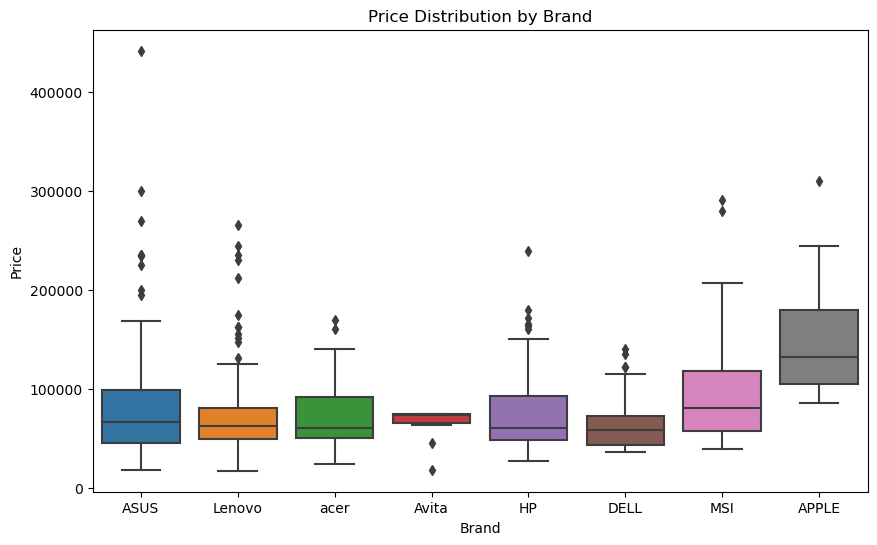

In [20]:
# dont plot pairplots, do individual plots with price
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='Price', data=df)
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

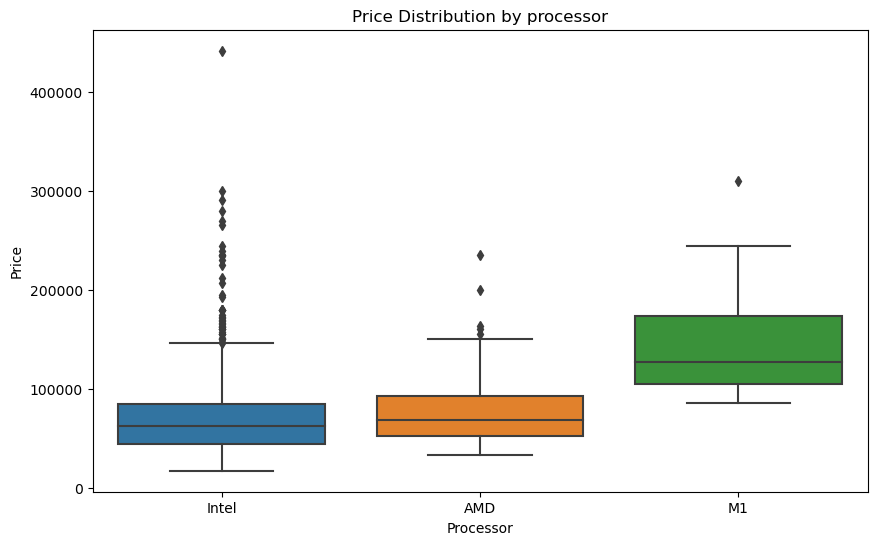

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='processor_brand', y='Price', data=df)
plt.title('Price Distribution by processor')
plt.xlabel('Processor')
plt.ylabel('Price')
plt.show()

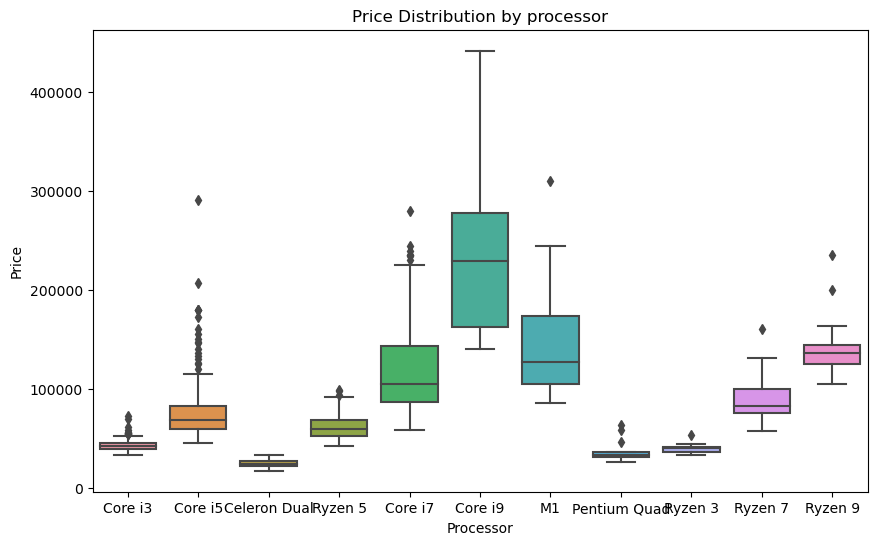

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='processor_name', y='Price', data=df)
plt.title('Price Distribution by processor')
plt.xlabel('Processor')
plt.ylabel('Price')
plt.show()


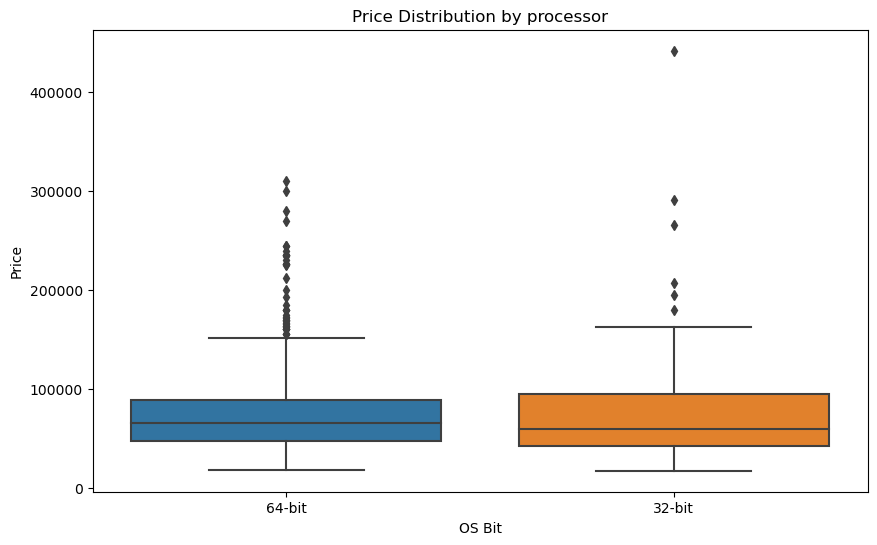

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='os_bit', y='Price', data=df)
plt.title('Price Distribution by OS')
plt.xlabel('OS Bit')
plt.ylabel('Price')
plt.show()



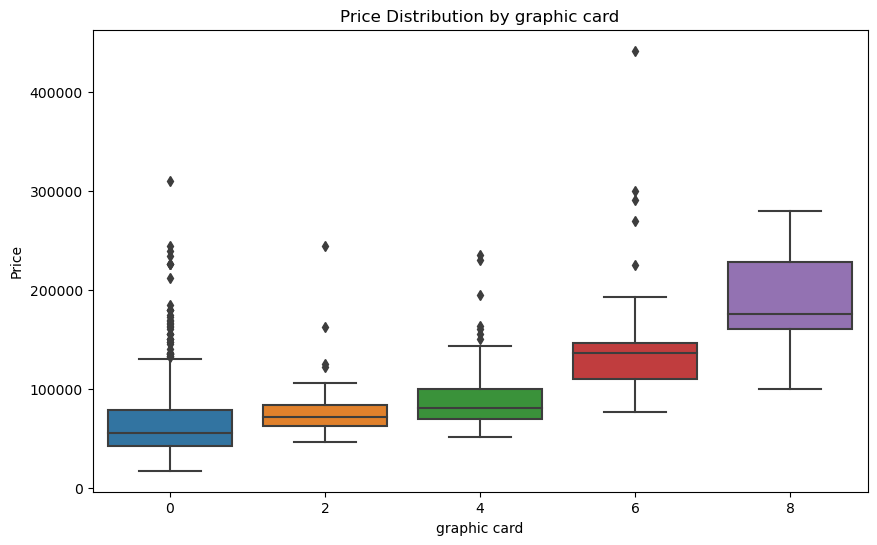

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='graphic_card_gb', y='Price', data=df)
plt.title('Price Distribution by graphic card')
plt.xlabel('graphic card')
plt.ylabel('Price')
plt.show()


In [99]:
def remove_outliers(df, column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

In [100]:
df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Number of Ratings')
df = remove_outliers(df, 'Number of Reviews')

In [101]:
#df = df.dropna()abel_encoder = LabelEncoder()
#df['brand'] = label_encoder.fit_transform(df['brand'])
#df['processor_brand'] = label_encoder.fit_transform(df['processor_brand'])
#df['processor_name'] = label_encoder.fit_transform(df['processor_name'])
#df['os'] = label_encoder.fit_transform(df['os'])
#df['os_bit'] = label_encoder.fit_transform(df['os_bit'])
#df['ram_type'] = label_encoder.fit_transform(df['ram_type'])
#df['weight'] = label_encoder.fit_transform(df['weight'])



#df['processor_gnrtn']=np.log1p(df['processor_gnrtn'])
#df['ram_gb']=np.log1p(df['ram_gb'])
#df['graphic_card_gb']=np.log1p(df['graphic_card_gb'])
#df['warranty_in_years']=np.log1p(df['warranty_in_years'])
df['rating']=np.log1p(df['rating'])
#df['ssd']=np.log1p(df['ssd'])
#df['hdd']=np.log1p(df['hdd'])
df['Number of Ratings']=np.log1p(df['Number of Ratings'])
df['Number of Reviews']=np.log1p(df['Number of Reviews'])


df = pd.get_dummies(df, columns=['brand','processor_brand', 'ram_type', 'os', 'os_bit','weight','processor_name'], drop_first=True)

Price                          1.000000
ssd                            0.645854
graphic_card_gb                0.476203
processor_name_Ryzen 9         0.408168
processor_name_Core i7         0.397741
ram_gb                         0.388118
ram_type_LPDDR4X               0.300747
Touchscreen                    0.277328
ram_type_DDR5                  0.156609
processor_name_Ryzen 7         0.147986
processor_name_Core i9         0.141935
warranty_in_years              0.139776
processor_name_M1              0.129852
os_Mac                         0.129852
processor_brand_M1             0.129852
brand_HP                       0.108301
brand_MSI                      0.105925
ram_type_LPDDR3                0.100993
ram_type_LPDDR4                0.091033
brand_ASUS                     0.063252
os_bit_64-bit                  0.053918
processor_gnrtn_missing        0.052427
msoffice                       0.041435
processor_name_Core i5         0.038116
weight_Gaming                  0.025117


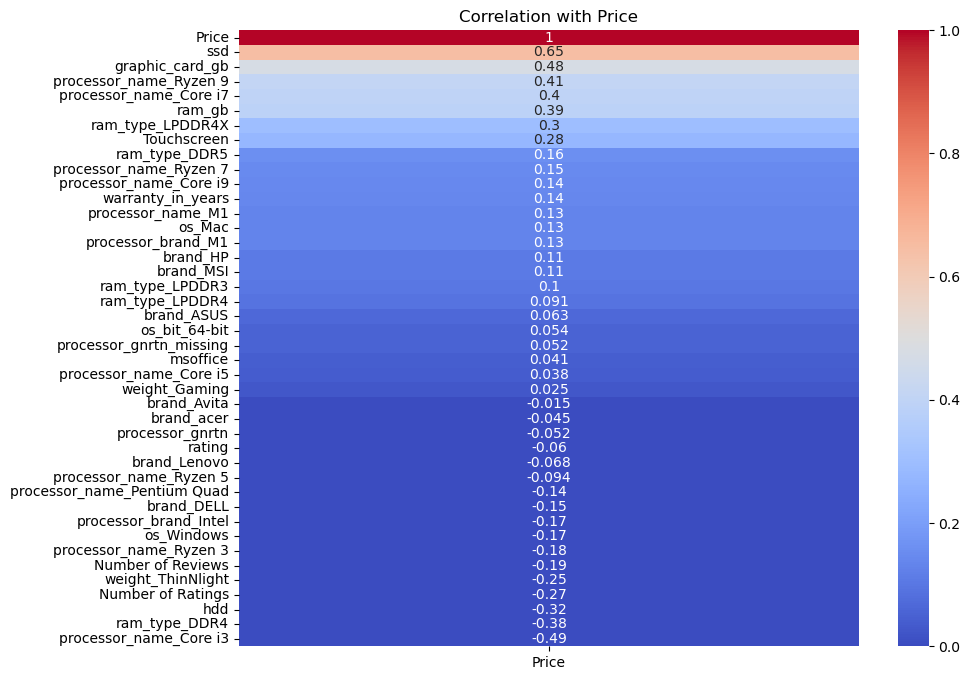

In [102]:
corr_matrix = df.corr()

# Extract the correlations with 'selling_price'
price_corr = corr_matrix['Price'].sort_values(ascending=False)

# Display the correlation values with 'selling_price'
print(price_corr)

# Plot the correlation heatmap for selling price correlations
plt.figure(figsize=(10, 8))
sns.heatmap(price_corr.to_frame(), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation with Price')
plt.show()

In [103]:
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [105]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'linear regression': LinearRegression(),
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scorers for MAE, MSE, and R2
scorers = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Evaluate models using cross-validation
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = {}
    for scorer_name, scorer in scorers.items():
        scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
        results[model_name][scorer_name] = scores
        print(f"{model_name} {scorer_name}: {scores.mean()}")

Evaluating Random Forest...
Random Forest MAE: -9428.78670040375
Random Forest MSE: -196541816.75990185
Random Forest R2: 0.7623132974470421
Evaluating Gradient Boosting...
Gradient Boosting MAE: -9579.963504242254
Gradient Boosting MSE: -200127941.7725173
Gradient Boosting R2: 0.7599714365360356
Evaluating XGBoost...
XGBoost MAE: -9129.067633971234
XGBoost MSE: -194990109.19898215
XGBoost R2: 0.7672670449622865
Evaluating linear regression...
linear regression MAE: -239482812546597.06
linear regression MSE: -1.6315941621755704e+31
linear regression R2: -1.8662065553643533e+22


In [106]:
# Define the hyperparameters grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [10, 50, 100, 250, 400],
        'max_depth': [None,5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
}

# Define the parameter distributions for RandomizedSearchCV
param_dists = {
    'Random Forest': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'learning_rate': [0.001, 0.01, 0.1, 0.05, 0.2],
        'max_depth': [3, 4, 5, 6, 7],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'learning_rate': [0.001, 0.01, 0.1, 0.05, 0.2],
        'max_depth': [3, 4, 5, 6, 7],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
    },
}


In [107]:
# Loop through models and perform GridSearchCV and RandomizedSearchCV
best_estimators = {}
for model_name, model in models.items():
    if model_name in param_grids:
        print(f"Performing GridSearchCV for {model_name}")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_estimators[f"{model_name} (GridSearch)"] = grid_search.best_estimator_
        print(f"Best parameters for {model_name} (GridSearch): {grid_search.best_params_}")
        
        print(f"Performing RandomizedSearchCV for {model_name}")
        randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_dists[model_name], n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
        randomized_search.fit(X_train, y_train)
        best_estimators[f"{model_name} (RandomizedSearch)"] = randomized_search.best_estimator_
        print(f"Best parameters for {model_name} (RandomizedSearch): {randomized_search.best_params_}")

        # Evaluate the best model from GridSearchCV
        best_grid_model = grid_search.best_estimator_
        y_pred = best_grid_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Evaluation for {model_name} (GridSearch):")
        print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")
        
        # Evaluate the best model from RandomizedSearchCV
        best_random_model = randomized_search.best_estimator_
        y_pred = best_random_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Evaluation for {model_name} (RandomizedSearch):")
        print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")

print("Best estimators:", best_estimators)

Performing GridSearchCV for Random Forest
Best parameters for Random Forest (GridSearch): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Performing RandomizedSearchCV for Random Forest
Best parameters for Random Forest (RandomizedSearch): {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Evaluation for Random Forest (GridSearch):
MSE: 144014588.20897937, MAE: 8455.803269160408, R2: 0.8468145322885997
Evaluation for Random Forest (RandomizedSearch):
MSE: 134318933.56912926, MAE: 8164.724578242081, R2: 0.8571276082710024
Performing GridSearchCV for Gradient Boosting
Best parameters for Gradient Boosting (GridSearch): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Performing RandomizedSearchCV for Gradient Boosting
Best parameters for Gradient Boosting (RandomizedSearch): {'subsample': 0.7, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_de